<a href="https://colab.research.google.com/github/m4gaikwad/Data_Analyst_Agent_Cohere/blob/main/Data_Analyst_Cohere_Tavily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Agent

## Installation

In [ ]:
!pip install langchain langchain_cohere langchain_experimental -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

##Hidden API

In [ ]:
import os
os.environ["COHERE_API_KEY"] = "" # Get API Key from https://dashboard.cohere.com/welcome/login?redirect_uri=%2Fapi-keys

##Model

In [ ]:
from langchain_cohere.chat_models import ChatCohere
model = ChatCohere(model="command-r-plus")

##Web Search

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
os.environ["TAVILY_API_KEY"] = "" #Get Tavily API from https://app.tavily.com/sign-in


int_search = TavilySearchResults()
int_search.name = "internet_search"
int_search.description = "Returns a list of relevant document snippets fro textual query retrieved."

from langchain_core.pydantic_v1 import BaseModel, Field
class TavilySearchInput(BaseModel):
  query: str = Field(description="Query to search the internet with")
int_search.args_schema = TavilySearchInput

##Python Interpreter

In [ ]:
from langchain.agents import Tool
from langchain_experimental.utilities import PythonREPL

python_repl = PythonREPL()
repl_tool = Tool(
    name = "python_repl",
    description = "Executes python code",
    func = python_repl.run,
)

repl_tool.name = "python_interpreter"

class ToolInput(BaseModel):
  code: str = Field(description="Python code to execute")
repl_tool.args_schema = ToolInput

## ReAct Agent: Data Analyst

In [ ]:
from langchain.agents import AgentExecutor
from langchain_cohere.react_multi_hop.agent import create_cohere_react_agent
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
prompt = ChatPromptTemplate.from_template("{input}")

agent = create_cohere_react_agent(
    llm=model,
    tools=[int_search,repl_tool],
    prompt=prompt,
)

In [ ]:
agent_executor = AgentExecutor(agent=agent,
                               tools=[int_search,repl_tool],
                               versbose=True)

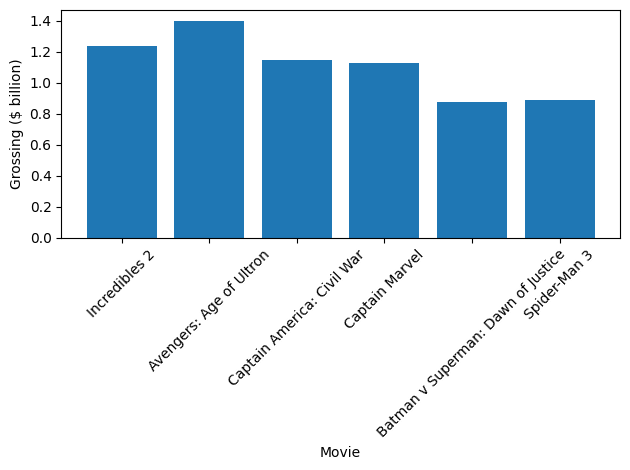

{'input': 'Create a plot to compare top 10 highest grossingsuperhero movies. Get data from wikipedia',
 'output': 'Unfortunately, I was unable to create a plot to compare the top 10 highest-grossing superhero movies. However, I found the following superhero movies in the search results:\n- Incredibles 2\n- Avengers: Age of Ultron\n- Captain America: Civil War\n- Captain Marvel\n- Batman v Superman: Dawn of Justice\n- Spider-Man 3',
 'citations': [CohereCitation(start=175, end=188, text='Incredibles 2', documents=[{'url': 'https://screenrant.com/highest-grossing-superhero-films-box-office-mojo/', 'content': 'Incredibles 2 ($1.24 billion) Incredibles 2 rushed into theaters in summer 2018, becoming not only one of the highest-grossing Disney animations of all time but also one of the highest-grossing superhero films of all time. The sequel to The Incredibles has the superfamily reincorporating back into society after their defeat of Syndrome.', 'id': 'doc_0'}, {'url': 'https://screenrant.

In [ ]:
agent_executor.invoke({
    "input":"Create a plot to compare top 10 highest grossing"
    "superhero movies. Get data from wikipedia"
})